In [12]:
import warnings
warnings.filterwarnings('once')

In [17]:
import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [23]:
import pandas_datareader.data as web    # pandas 0.19.x and later
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2024, 11, 27)
unem = web.DataReader("DGS10", "fred", start, end)

In [27]:
unem.index.name = None
unem.dropna(inplace=True)



fin_train = '2018-03-01'
print(
    f"Fechas train : {unem.index.min()} --- {unem.loc[:fin_train].index.max()}  "
    f"(n={len(unem.loc[:fin_train])})"
)
print(
    f"Fechas test  : {unem.loc[fin_train:].index.min()} --- {unem.loc[:].index.max()}  "
    f"(n={len(unem.loc[fin_train:])})"
)
datos_train = unem.loc[:fin_train]
datos_test  = unem.loc[fin_train:]
datos_test

Fechas train : 2010-01-04 00:00:00 --- 2018-03-01 00:00:00  (n=2043)
Fechas test  : 2018-03-01 00:00:00 --- 2024-11-27 00:00:00  (n=1688)


,DGS10
2018-03-01,2.81
2018-03-02,2.86
2018-03-05,2.88
2018-03-06,2.88
2018-03-07,2.89
...,...
2024-11-21,4.43
2024-11-22,4.41
2024-11-25,4.27
2024-11-26,4.30


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -1.4728955864620996, p-value: 0.546874372626933
KPSS Statistic: 1.18413079821669, p-value: 0.01

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -46.5090184289266, p-value: 0.0
KPSS Statistic: 0.3320393522121885, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -14.860621848970906, p-value: 1.7214741460447134e-27
KPSS Statistic: 0.08792748619023044, p-value: 0.1


<Axes: title={'center': 'Diferenciación orden 2'}>

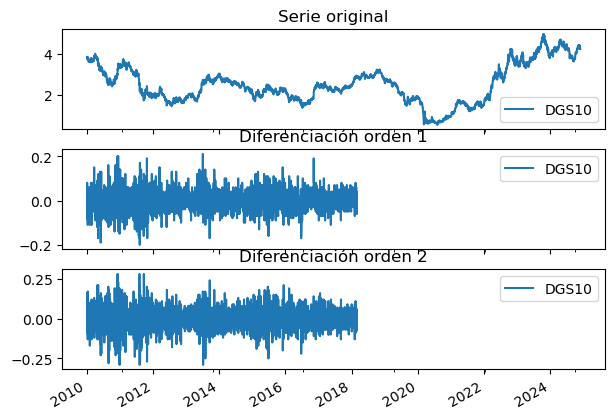

In [28]:
# Test estacionariedad
# ==============================================================================
warnings.filterwarnings("ignore")

datos_diff_1 = datos_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(unem)
kpss_result = kpss(unem)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(unem.diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(unem.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")


import matplotlib.pyplot as plt
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)
unem.plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2')